# Eigenvalues (and eigenvectors)

## What is an eigenvector
An vector $x \ne 0$ is called an **eigenvector** of a square matrix $A$ if there exists a number $\lambda$ such that  
$$
   Ax = \lambda x.
$$
The number $\lambda$ is called an **eigenvalue**.  
The names **eigenpair** and **eigenproblem** are also used.

## Google PageRank
One of the most famous eigenvectors computation is the **Google PageRank**. 
It is not actively used by Google nowdays, but it was of the main features in its early stages. The question is how do we rank webpages, which one is important, and which one is not. 
All we know about the web is which page referrs to which. PageRank is defined by a recursive definition. Denote by $p_i$ the **importance** of the $i$-th page. Then we define this importance as an average value of all importances of all pages that refer to the current page. It gives us a linear system  
$$
    p_i = \sum_{j \in N(i)} \frac{p_j}{L(j)},
$$
where $L(j)$ is the number of outgoing links on the $j$-th page, $N(i)$ are all the neighbours. It can be rewritten as  
$$
   p = G p,
$$
or as an eigenvalue problem

$$
   Gp = 1 p,
$$
i.e. the eigenvalue $1$ is already known.

## Demo
We can compute it using some Python packages. 
We will use ```networkx``` package for working with graphs that can be installed using  
```conda/pip install networkx```

We will use a simple example of Zachary karate club network. This data was collected in 1977, and is a classical social network dataset.

/Users/aelphy/py37/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


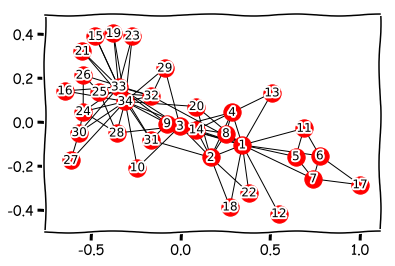

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
plt.xkcd()

kn = nx.read_gml('karate.gml', label='id')
nx.draw_networkx(kn) #Draw the graph

Now we can actually compute the PageRank using the NetworkX built-in function. We also plot 
the size of the nodes larger if its PageRank is larger.

Text(0.5, 1.0, 'PageRank nodes')

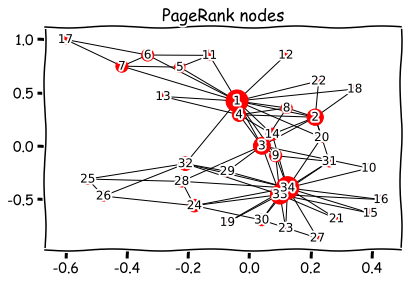

In [6]:
pr = nx.algorithms.link_analysis.pagerank(kn)
pr_vector = [pr[i+1] for i in range(len(pr))]
pr_vector = np.array(pr_vector) * 5000
nx.draw_networkx(kn, node_size=pr_vector, labels=None)
plt.tight_layout()
plt.title('PageRank nodes')

## Computation of the eigenvalues via characteristic equations
The eigenvalue problem has the form  
$$
    Ax = \lambda x, 
$$
or 
$$
   (A - \lambda I) x = 0,
$$
therefore matrix $A - \lambda I$ has non-trivial nullspace and should be singular. That means, that the **determinant**  

$$
   p(\lambda) = \det(A - \lambda I) = 0.
$$

The equation is is called **characteristic equations** and is a polynomial of order $n$.    
The $n$-degree polynomial has $n$ complex roots!

## Remember the determinant
The determinant of a square matrix $A$ is defined as 

$$\det A = \sum_{\sigma \in S_n} \mathrm{sgn}({\sigma})\prod^n_{i=1} a_{i, \sigma_i},$$

where $S_n$ is the set of all **permutations** of the numbers $1, \ldots, n$,

and $\mathrm{sgn}$ is the **signature** of the permutation ( $(-1)^p$ where $p$ is the number of transpositions to be made).

## Properties of the determinant
The determinant has many nice properties:

1. $\det(AB) = \det(A) \det(B)$
2. If we have one row as a sum of two vectors, the determinant is a sum of two determinant
3. "Minor expansion": we can expand the determinant through a selected row.

If you do it via **minor expansion**, we get **exponential** complexity in $\mathcal{O}(n)$.

## Eigenvalues and characteristic equation

Now we go back to the eigenvalues.

The characteristic equation can be used to compute the eigenvalues, which leads to **naive** algorithm:

$$p(\lambda) = \det(A - \lambda I)$$

1. Compute coefficients of the polynomial
2. Compute the roots

We can do a short demo of this

Text(0, 0.5, 'Imaginary part')

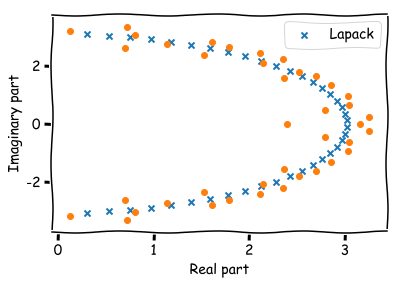

In [9]:
import numpy as np

n = 40
a = [[1.0 / (i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
ev = np.linalg.eigvals(a)
#print 'Eigenvalues using Lapack function:', ev
#There is a special numpy function for chacteristic polynomial
cf = np.poly(a)
ev_roots = np.roots(cf)
#print 'Coefficients of the polynomial:', cf
#print 'Polynomial roots:', ev_roots
plt.scatter(ev.real, ev.imag, marker='x', label='Lapack')
b = a + 1e-1 * np.random.randn(n, n)
ev_b = np.linalg.eigvals(b)
plt.scatter(ev_b.real, ev_b.imag, marker='o')
#plt.scatter(ev_roots.real, ev_roots.imag, marker='o', label='Brute force')
plt.legend(loc='best')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')

**Morale**: 

- Do not do that, unless you have a reason. 
- Polynomial rootfinding is very **ill-conditioned** (can be much better, but not with monomials!)

## Gershgorin circles
There is a very interesting theorem that sometimes helps to localize the eigenvalues. 

It is called **Gershgorin theorem**.  

It states that all the eigenvalues $\lambda_i, \quad i = 1, \ldots, n$ are located inside the union of **Gershgorin circles** $C_i$,  where $C_i$ is a disk on the complex plane with center $a_{ii}$ and radius  

$$r_i = \sum_{j \ne i} |a_{ij}|.$$

Moreover, if the circles do not intersect, that contain only one eigenvalues. The proof is instructive, since it uses the concepts we looked at the previous lectures.

## Proof
First we need to show, that if the matrix $A$ is strictly diagonally dominant, i.e. 

$$
   |a_{ii}| > \sum_{j \ne i} |a_{ij}|,
$$
then such matrix is non-singular.

We separate the diagonal part and off-diagonal part, and get  

$$
    A = D + S,
$$

and $\Vert D^{-1} S\Vert_1 < 1$. Therefore, by using the **Neumann series**, the matrix $D + S$ is invertible.

Now the proof follows by contradiction: 

if any of the eigenvalues lies outside all of the circles, the matrix $(A - \lambda I)$ 

is strictly diagonally dominant, and thus is invertible. 

That means, that $(A - \lambda I) x = 0$ means $x = 0$. 

## A short demo

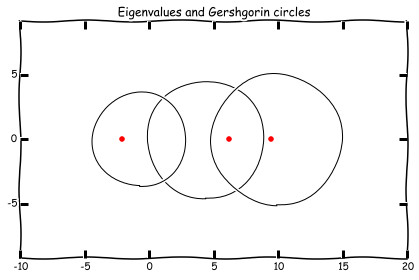

In [78]:
import numpy as np
%matplotlib inline
n = 3
fig, ax = plt.subplots(1, 1)
a = [[5, 1, 1], [1, 0, 0.5], [2, 0, 10]]
#a = [[1.0 / (i - j + 0.5) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
#a = np.diag(np.arange(n))
a = a +2*np.random.randn(n, n)
#u = np.random.randn(n, n)
#a = np.linalg.inv(u).dot(a).dot(u)
xg = np.diag(a).real
yg = np.diag(a).imag
rg = np.zeros(n)
ev = np.linalg.eigvals(a)
for i in xrange(n):
    rg[i] = np.sum(np.abs(a[i, :])) - np.abs(a[i, i])
    crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
    ax.add_patch(crc)
plt.scatter(ev.real, ev.imag, label='x', color='r')
plt.axis('equal')
ax.set_title('Eigenvalues and Gershgorin circles')
fig.tight_layout()

**Note**: There are more complicated figures, like Cassini ovals, that include the spectra.

## Power method
We are often interested in the computation of the part of the spectrum, like the largest eigenvalues, smallest eigenvalues. Also it is interesting to note that for the Hermitian matrices $(A = A^*)$ the eigenvalues are always real (prove it!).  

A power method is the simplest method for the computation of the largest eigenvalue in modulus. It is also our first example of the **iterative method** and **Krylov method**.

Power method has the form
$$
    x_{k+1} = A x_k, \quad x_{k+1} := \frac{x_{k+1}}{\Vert x_{k+1} \Vert_2}.
$$
The convergence is geometric, but the convergence ratio is $q^k$, where $q = |\frac{\lambda_{2}}{\lambda_{1}}| \leq 1$ and $k$ is the number of iterations. It means, the convergence can be artitrary small. To prove it, it is sufficient to consider a $2 \times 2$ diagonal matrix.

Lets have a more precise look at the power method when $A$ is Hermitian. There exists orthonormal basis of eigenvectors $v_1,\dots,v_n$ such that $Av_i = \lambda_i v_i$. Let us decompose $x_0$ into a sum of $v_i$ with coefficients $c_i$:
$$
x_0 = c_1 v_1 + \dots + c_n v_n.
$$
Since $v_i$ are eigenvectors, we have
$$
\begin{split}
x_1 &= \frac{Ax_0}{\|Ax_0\|} = \frac{c_1 \lambda_1 v_1 + \dots + c_n \lambda_n v_n}{\|c_1 \lambda_1 v_1 + \dots + c_n \lambda_n v_n \|}  \\
&\vdots\\
x_k &= \frac{Ax_{k-1}}{\|Ax_{k-1}\|} = \frac{c_1 \lambda_1^k v_1 + \dots + c_n \lambda_n^k v_n}{\|c_1 \lambda_1^k v_1 + \dots + c_n \lambda_n^k v_n \|}
\end{split}
$$
Now you see, that 
$$
x_k = \frac{c_1}{|c_1|}\left(\frac{\lambda_1}{|\lambda_1|}\right)^k\frac{ v_1 + \frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k} + \dots + \frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}}{\|v_1 + \frac{c_2}{c_1}\frac{\lambda_2^k}{\lambda_1^k} + \dots + \frac{c_n}{c_1}\frac{\lambda_n^k}{\lambda_1^k}\|},
$$
which converges to $v_1$ since $\left| \frac{c_1}{|c_1|}\left(\frac{\lambda_1}{|\lambda_1|}\right)^k\right| = 1$ and $\left(\frac{\lambda_2}{\lambda_1}\right)^k \to 0$ if $|\lambda_2|<|\lambda_1|$.

## Things to remember about the power method
- One step requires one matrix-by-vector product. If the matrix allows for an $\mathcal{O}(n)$ matvec (for example, it is sparse), 
  then it is possible.
- Convergence can be slow
- If only a rough estimate is needed, only a few iterations are needed
- The solution vector is in the **Krylov subspace** and has the form $\mu A^k x_0$, where $\mu$ is the normalization constant. 
